# MAIN CODE

# Workings

In [1]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd
from matplotlib import pyplot as plt

Trying out for 1 stock and 1 date range first

In [3]:
ticker = "QQQM"
startDate = "2021-09-15"
endDate = "2022-01-13"

In [4]:
def convert_date_to_correct_format(date):
    dateofint = datetime.strptime(date, '%Y-%m-%d')
    print(f"Date = {dateofint}")
    print(f"Weekday Number: {dateofint.weekday()}")
    if(dateofint.weekday() > 4):
        print(f"Is a Weekdend")
#         dateofint = dateofint - timedelta(days=2)
    return dateofint

In [5]:
startDate = convert_date_to_correct_format(startDate)
endDate = convert_date_to_correct_format(endDate)

Date = 2021-09-15 00:00:00
Weekday Number: 2
Date = 2022-01-13 00:00:00
Weekday Number: 3


In [6]:
tickerObject = yf.Ticker(ticker)
data = tickerObject.history(start=startDate, end=endDate)

In [7]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-14,154.996144,155.255628,153.529113,153.928314,326700,0.000,0
2021-09-15,154.117922,155.195742,153.189809,155.046051,445500,0.000,0
2021-09-16,154.517117,155.395343,153.698766,155.155823,446100,0.000,0
2021-09-17,154.846446,154.846446,152.920338,153.359451,358200,0.000,0
2021-09-20,150.947730,151.756965,148.210320,150.258377,1770000,0.166,0
...,...,...,...,...,...,...,...
2022-01-06,157.225006,159.270004,156.339996,157.960007,922500,0.000,0
2022-01-07,157.854996,158.619995,155.500000,156.270004,581900,0.000,0
2022-01-10,154.145004,156.520004,151.880005,156.419998,1057000,0.000,0


In [8]:
closePricesDf = data['Close']
closePricesDf.name = ticker
closePricesDf

Date
2021-09-14    153.928314
2021-09-15    155.046051
2021-09-16    155.155823
2021-09-17    153.359451
2021-09-20    150.258377
                 ...    
2022-01-06    157.960007
2022-01-07    156.270004
2022-01-10    156.419998
2022-01-11    158.610001
2022-01-12    159.360001
Name: QQQM, Length: 85, dtype: float64

In [ ]:
print(list(data.index)[1])
print(pd.Timestamp(2021, 10, 5))

In [ ]:
print(startDate)
print(endDate)
pd.date_range(start=startDate, end=endDate)

In [ ]:
# # Covered below
# dd = pd.Timestamp(2022, 1, 15)
# holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=dd))
# holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
# holdingUpdateDf.head(10)

In [ ]:
# # Covered below
# holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
# # holdingUpdateDf.head(10)

In [10]:
ticker_column_name = ticker + " Holdings"
ticker_column_name

'QQQM Holdings'

In [11]:
holdings = pd.read_csv('holdings.csv', index_col='Date', parse_dates=True, dayfirst=True)
holdings['cumulative'] = holdings[ticker_column_name].cumsum()
# aaplHoldings.drop(['AAPL Holdings'])
holdings.drop(columns=[ticker_column_name], inplace = True)
holdings

,cumulative
Date,
2021-09-20,5
2021-10-15,10
2021-11-15,15
2021-12-15,20


In [12]:
# dd = pd.Timestamp(2022, 1, 15)
holdingUpdateDf = pd.DataFrame(index = pd.date_range(start=startDate, end=endDate))
holdingUpdateDf = pd.merge(holdingUpdateDf, closePricesDf, how = 'left', left_index=True, right_index=True)
holdingUpdateDf.head(10)

holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")

holdingUpdateDf = pd.merge(holdingUpdateDf, holdings, how = 'left', left_index=True, right_index=True)
holdingUpdateDf['invested'] = holdingUpdateDf['cumulative'] * holdingUpdateDf[ticker]
holdingUpdateDf = holdingUpdateDf.fillna(method="ffill")
holdingUpdateDf = holdingUpdateDf.fillna(0)
holdingUpdateDf

,QQQM,cumulative,invested
2021-09-15,155.046051,0.0,0.000000
2021-09-16,155.155823,0.0,0.000000
2021-09-17,153.359451,0.0,0.000000
2021-09-18,153.359451,0.0,0.000000
2021-09-19,153.359451,0.0,0.000000
...,...,...,...
2022-01-09,156.270004,20.0,3259.328003
2022-01-10,156.419998,20.0,3259.328003
2022-01-11,158.610001,20.0,3259.328003
2022-01-12,159.360001,20.0,3259.328003


In [14]:
valueDf = holdingUpdateDf.copy()
valueDf['value'] = valueDf[ticker]*valueDf['cumulative']
valueDf

,QQQM,cumulative,invested,value
2021-09-15,155.046051,0.0,0.000000,0.000000
2021-09-16,155.155823,0.0,0.000000,0.000000
2021-09-17,153.359451,0.0,0.000000,0.000000
2021-09-18,153.359451,0.0,0.000000,0.000000
2021-09-19,153.359451,0.0,0.000000,0.000000
...,...,...,...,...
2022-01-09,156.270004,20.0,3259.328003,3125.400085
2022-01-10,156.419998,20.0,3259.328003,3128.399963
2022-01-11,158.610001,20.0,3259.328003,3172.200012
2022-01-12,159.360001,20.0,3259.328003,3187.200012


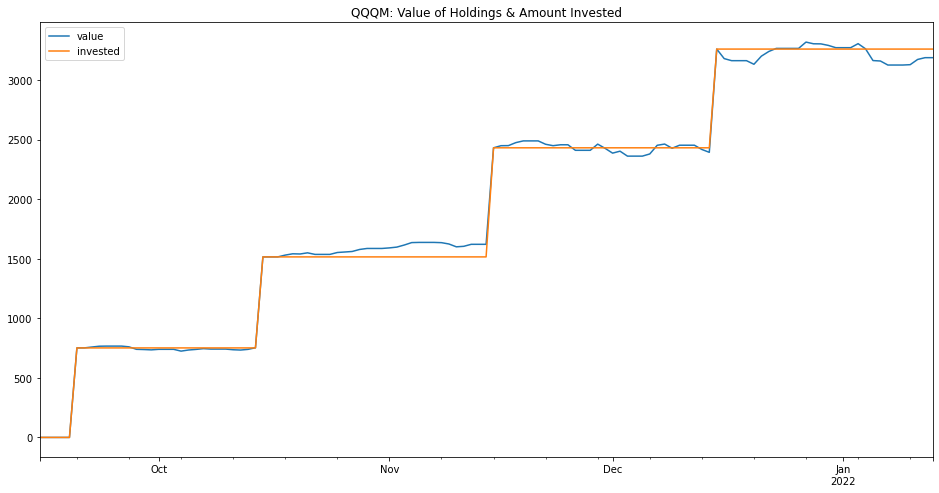

In [22]:
title = f'{ticker}: Value of Holdings & Amount Invested'
valueDf['value'].plot(label = "value", figsize=(16,8), title = title)
valueDf['invested'].plot(label = "invested")

plt.legend()
plt.show()